<h3>Goal<h3>

In this chapter:
   * We will see how to match features in one image with others
   * We will use the Brute-Force matcher and FLANN matcher in opencv

<h3> Basic of Brute Force matcher <h3>

It take the descriptor of one feature in first set and matched with all other features in second set using some distance calculation. And the closet one is returned.

For BF matcher, first we have to create the BF matcher object use cv.BFMatcher(). It take two optinal params. First one is normType.It specifics the distance measurements to be used. By default, it is cv.NORM_L2. It is good for ___SIFT,SURF___(cv.NORM_L1 is also there). For binary string based discriptors like ORB, BRIEF, BRISK, cv.NORM_HARMMING should be used. If ORB is using WTA_K ==  3 or 4, cv.NORM_HARMMING2 should be used.

Second param is boolean variable, crossCheck is false by default. If it is true, Matcher returns only those matches with value (i,j) such that i-th descriptor in set A has j-th descriptor in set B as best match and vice-versa.That is, the two features in both sets should match each other. It provides consistent result, and is a good alternative to ratio set proposed by Dlowe in SIFT paper.

Once it is created, two important methods are BFmatcher.match() and BFmatcher.knnmatch(). First one returns the best match. second method returns k best matches where k is specified by the user. It may be useful when we need to do addition work on that.

Like we used cv.drawKeypoint() to draw key points. cv.drawMatches() help us to draw matches. It stacks two images horizontally and draw lines from first image to second image showing the best matches. There is also cv.drawMatchknn which draw all the k best matches. if K = 2, it draw two match lines for each key point. So we have to pass a mask if we want to selectively draw it.

Let's see one example for each of SIFT and ORB.

<h3>Brute-Force Matching with ORB Descriptors<h3>

Here, we will see a simple example on how to match features between two images. In this case, I have a queryImage and a trainImage. We will try to find the queryImage in trainImage using feature matching.

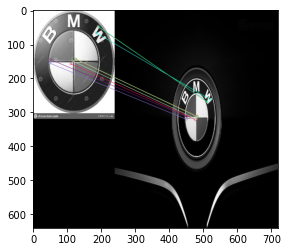

(<matplotlib.image.AxesImage at 0x1f017dc7400>, None)

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread("bmwbox.jpg",cv.IMREAD_GRAYSCALE)
img1 = cv.resize(img1,(240,320))
img2 = cv.imread("bmw.jpg",cv.IMREAD_GRAYSCALE)
img2 = cv.resize(img2,(480,640))

# Initiane ORB detector
orb =  cv.ORB_create()
# Find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
#create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck = True)
#Match descriptors
matches = bf.match(des1,des2)
#Sort them in the order of their distance
matches = sorted(matches, key = lambda x:x.distance)
#Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img3),plt.show()

<h3>What is this Matcher Object?<h3>

The result of matches = bf.match(des1,des2) is a list of Dmatch object. This Dmatch object has following attributes:
   * DMatch distance - Distance between descriptors
   * DMatch trainIdx - Index of the descriptor in train descriptors.
   * DMatch queryIdx - Index of the descriptor in query descriptors
   * DMatch imgIdx- Index of the train image

<h3>Brute-Force Matching with SIFT Descriptors and Ratio Test<h3>

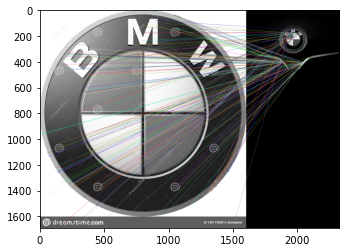

(<matplotlib.image.AxesImage at 0x1f017c9d730>, None)

In [9]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('bmwbox.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('bmw.jpg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.8*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

<h3>FLANN based Matcher<h3>

FLANN stands for Fast Library for Approximate Nearest Neighbors. It contains a collection ò algorihms optimized for fast nearest neighbor search in large datasets and for high dimensional features. It works faster than BFMatcher for large datasets. We will see second example with FLANN based matcher.

For FLANN based matcher, we need to pass to dictionaries which specifies the algorithm to be used, its related paramaters etc. First one s IndexParams. For various algorithms, the information to be passed is explained in FLANN docs. As a summaru, for algorithms like SIFT, SUFT etc, you can pass following:

In [ ]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)


While using ORB, you can pass the following. The commented values are recommended as per the docs, but it didn't provide required results in some cases. Other values worked fine.:

In [ ]:
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2

Second dictionary is the SearchParams. It speciffies the number of times in the index should be recursively traversed. Higher values gives better precision, but also takes more time. If you want to change the value, pass search_params = dict(checks = 100)

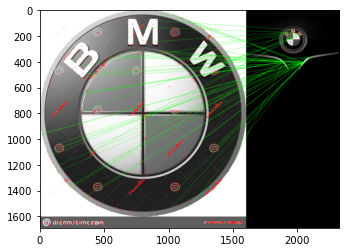

(<matplotlib.image.AxesImage at 0x1f017d51ac0>, None)

In [10]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('bmwbox.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('bmw.jpg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()